In [31]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation
import matplotlib.pyplot as plt

<h3>loading bike rent dataset

In [2]:
df = pd.read_csv('hour.csv')

In [3]:
df.head(20)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


<b><h3>As the 'instant' and 'dteday' are irrelevant to dataset, dropping them.<br>
Since 'atemp' is enough to predict tempareture, we dont need 'temp'.<br>
As we are having 'working day' and 'holiday' columns, 'weekday' is not nessesery.

In [4]:
df.drop(['instant','dteday','weekday','temp'],axis=1,inplace=True)

In [5]:
df

,season,yr,mnth,hr,holiday,workingday,weathersit,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,0,0,1,0.2879,0.81,0.0000,3,13,16
1,1,0,1,1,0,0,1,0.2727,0.80,0.0000,8,32,40
2,1,0,1,2,0,0,1,0.2727,0.80,0.0000,5,27,32
3,1,0,1,3,0,0,1,0.2879,0.75,0.0000,3,10,13
4,1,0,1,4,0,0,1,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,2,0.2576,0.60,0.1642,11,108,119
17375,1,1,12,20,0,1,2,0.2576,0.60,0.1642,8,81,89
17376,1,1,12,21,0,1,1,0.2576,0.60,0.1642,7,83,90
17377,1,1,12,22,0,1,1,0.2727,0.56,0.1343,13,48,61


<AxesSubplot:xlabel='holiday', ylabel='cnt'>

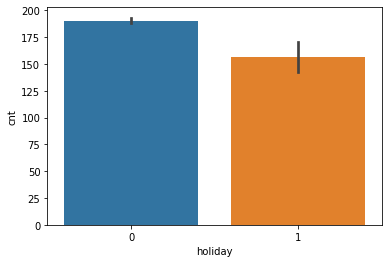

In [6]:
sns.barplot(x='holiday',y='cnt',data=df)
#so more bikes are rented on working days

In [7]:
#scaling of data
df['season'] = df['season']/4
df['mnth'] = df['mnth']/12
df['hr'] = df['hr']/23

In [8]:
#scaling casual and registered columns b/w 0-1
scale = MinMaxScaler()
df[['casual','registered']] = scale.fit_transform(df[['casual','registered']])

In [9]:
df.head(10)

,season,yr,mnth,hr,holiday,workingday,weathersit,atemp,hum,windspeed,casual,registered,cnt
0,0.25,0,0.083333,0.000000,0,0,1,0.2879,0.81,0.0000,0.008174,0.014673,16
1,0.25,0,0.083333,0.043478,0,0,1,0.2727,0.80,0.0000,0.021798,0.036117,40
2,0.25,0,0.083333,0.086957,0,0,1,0.2727,0.80,0.0000,0.013624,0.030474,32
3,0.25,0,0.083333,0.130435,0,0,1,0.2879,0.75,0.0000,0.008174,0.011287,13
4,0.25,0,0.083333,0.173913,0,0,1,0.2879,0.75,0.0000,0.000000,0.001129,1
5,0.25,0,0.083333,0.217391,0,0,2,0.2576,0.75,0.0896,0.000000,0.001129,1
6,0.25,0,0.083333,0.260870,0,0,1,0.2727,0.80,0.0000,0.005450,0.000000,2
7,0.25,0,0.083333,0.304348,0,0,1,0.2576,0.86,0.0000,0.002725,0.002257,3
8,0.25,0,0.083333,0.347826,0,0,1,0.2879,0.75,0.0000,0.002725,0.007901,8
9,0.25,0,0.083333,0.391304,0,0,1,0.3485,0.76,0.0000,0.021798,0.006772,14


In [19]:
y = df['cnt'].values
X = df.drop('cnt',axis=1)
X.shape[1]

12

In [16]:
#splitting our dataset into train and test with 0.25 for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=66)

In [37]:
#model building and compiling.
model = Sequential()

model.add(Dense(64,input_shape=[X.shape[1]]))
model.add(Activation('relu'))

model.add(Dense(32))
model.add(Activation('relu'))

model.add(Dropout(0.4))

model.add(Dense(16))
model.add(Activation('relu'))

model.add(Dense(1))


# Here I used Mean squared error as loss and RMSprop as my optimizer and I also monitored Mean absolute error
model.compile(optimizer='RMSprop', as loss='mse',metrics=['mse','mae'])

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 64)                832       
_________________________________________________________________
activation_16 (Activation)   (None, 64)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 32)                2080      
_________________________________________________________________
activation_17 (Activation)   (None, 32)                0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 16)                528       
_________________________________________________________________
activation_18 (Activation)   (None, 16)               

In [38]:
#experimented value of epochs. After 60, the model starts overfitting.
history = model.fit(X_train,y_train,epochs=50,batch_size=64,verbose=1, as validation_split=0.15)

Epoch 1/50
174/174 [==============================] - 0s 2ms/step - loss: 56779.4492 - mse: 56779.4492 - mae: 167.5446 - val_loss: 31652.5977 - val_mse: 31652.5977 - val_mae: 129.6313
Epoch 2/50
174/174 [==============================] - 0s 2ms/step - loss: 28618.5117 - mse: 28618.5117 - mae: 129.7805 - val_loss: 22543.2852 - val_mse: 22543.2852 - val_mae: 117.7041
Epoch 3/50
174/174 [==============================] - 0s 2ms/step - loss: 20509.6953 - mse: 20509.6953 - mae: 109.3547 - val_loss: 12666.6309 - val_mse: 12666.6309 - val_mae: 85.5899
Epoch 4/50
174/174 [==============================] - 0s 2ms/step - loss: 11633.0918 - mse: 11633.0918 - mae: 76.7976 - val_loss: 5631.6929 - val_mse: 5631.6929 - val_mae: 53.3134
Epoch 5/50
174/174 [==============================] - 0s 2ms/step - loss: 6410.2148 - mse: 6410.2148 - mae: 54.1193 - val_loss: 2728.8770 - val_mse: 2728.8770 - val_mae: 34.8777
Epoch 6/50
174/174 [==============================] - 0s 2ms/step - loss: 4047.1973 - mse: 

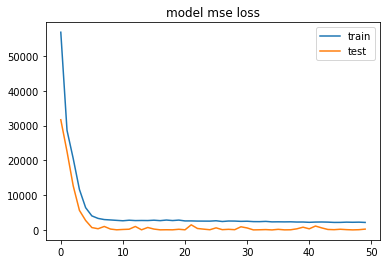

In [39]:
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('model mse loss')
plt.legend(['train','test']) 1

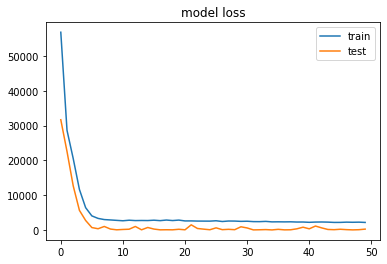

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.legend(['train','test'])

In [42]:
h = model.evaluate(X_test,y_test)

136/136 [==============================] - 0s 840us/step - loss: 241.5194 - mse: 241.5194 - mae: 13.3271


<h3> So, our model was able to predict with (+/-)15 which is Good for given Dataset

In [50]:
print(" Model loss : ",np.sqrt(h[0]),"\n","Mean absolute error : ",h[2])

 Model loss :  15.540894244569662 
 Mean absolute error :  13.32714557647705


In [53]:
model.save('bike_hour.h5')